In [4]:
# Final Project Scratch

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from itertools import product

In [5]:
music = pd.read_csv('music.csv')

In [6]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [7]:
# Remove columns ID and Name

music = music.drop('id', 1)
music = music.drop('name', 1)

In [8]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [9]:
# Decades Variable

#music.loc[1,1]
#len(music)
music['year'][1201] >= 1930
music.year[1201] >= 1930

music['decade'] = 1

In [10]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [11]:
for i in range(len(music)):
    if (music.year[i] >= 1920) & (music.year[i] < 1930):
        music['decade'][i] = 1920
    elif (music.year[i] >= 1930) & (music.year[i] < 1940):
        music['decade'][i] = 1930
    elif (music.year[i] >= 1940) & (music.year[i] < 1950):
        music['decade'][i] = 1940
    elif (music.year[i] >= 1950) & (music.year[i] < 1960):
        music['decade'][i] = 1950
    elif (music.year[i] >= 1960) & (music.year[i] < 1970):
        music['decade'][i] = 1960
    elif (music.year[i] >= 1970) & (music.year[i] < 1980):
        music['decade'][i] = 1970
    elif (music.year[i] >= 1980) & (music.year[i] < 1990):
        music['decade'][i] = 1980
    elif (music.year[i] >= 1990) & (music.year[i] < 2000):
        music['decade'][i] = 1990
    elif (music.year[i] >= 2000) & (music.year[i] < 2010):
        music['decade'][i] = 2000
    elif (music.year[i] >= 2010) & (music.year[i] < 2020):
        music['decade'][i] = 2010
    else:
        music['decade'][i] = 2020

/var/folders/hr/q7jvsqzd6n9fz7ld_5zx4df00000gn/T/ipykernel_71270/2075037868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['decade'][i] = 1920
/var/folders/hr/q7jvsqzd6n9fz7ld_5zx4df00000gn/T/ipykernel_71270/2075037868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['decade'][i] = 1930
/var/folders/hr/q7jvsqzd6n9fz7ld_5zx4df00000gn/T/ipykernel_71270/2075037868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mus

In [12]:
music[['year', 'decade']]

year  decade
0       1920    1920
1       1920    1920
2       1920    1920
3       1920    1920
4       1920    1920
...      ...     ...
174384  2020    2020
174385  2021    2020
174386  2020    2020
174387  2021    2020
174388  2020    2020

[174389 rows x 2 columns]

2010    22455
1990    20328
1970    20118
1980    20074
1950    20000
1960    19610
1940    15493
2000    13782
1930    10764
2020     6134
1920     5631
Name: decade, dtype: int64

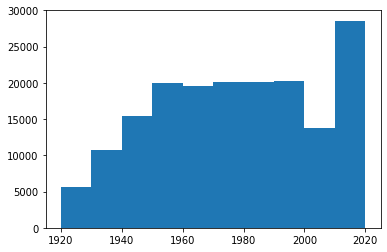

In [13]:
plt.hist(music.decade)
music.decade.value_counts()

2    43768
4    43669
3    43134
1    42737
0     1081
Name: tempo_disc, dtype: int64

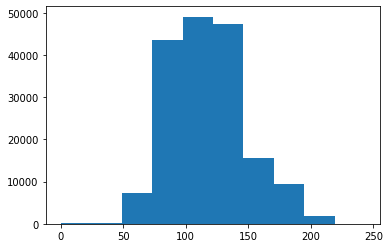

In [14]:
#Tempos
# hist(music$tempo)
# music$tempo_disc <- discretize(music$tempo, method = "cluster", breaks = 5, labels = FALSE)
# music$tempo_disc <- as.factor(music$tempo_disc)
# table(music$temp_disc)

plt.hist(music.tempo)
music["tempo_disc"] = np.digitize(music.tempo, [60, 94, 116, 135])
music["tempo_disc"] = music["tempo_disc"].astype(str)
music.tempo_disc.value_counts()

In [15]:
#Multi Artists
# for (i in 1:nrow(music)) {
#   if (grepl("', '", music$artists[i])) { music$multi_artist[i] <- 1 }
#   else { music$multi_artist[i] <- 0 }
# }
# table(music$multi_artist)

music["multi_artist"] = np.where(("," in music.artists), 1, 0) #I don't know why but this line has to be run before the for loop
for i in range(len(music)):
    if "," in music.artists[i]:
        music.multi_artist[i] = 1
    else:
        music.multi_artist[i] = 0

music.multi_artist = music.multi_artist.astype(str) 
music.multi_artist.value_counts()

/var/folders/hr/q7jvsqzd6n9fz7ld_5zx4df00000gn/T/ipykernel_71270/3859284878.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.multi_artist[i] = 0
/var/folders/hr/q7jvsqzd6n9fz7ld_5zx4df00000gn/T/ipykernel_71270/3859284878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.multi_artist[i] = 1


0    136808
1     37581
Name: multi_artist, dtype: int64

In [16]:
# Explicit - make factor
# music$explicit <- as.factor(music$explicit)

music.explicit = music.explicit.astype(str)

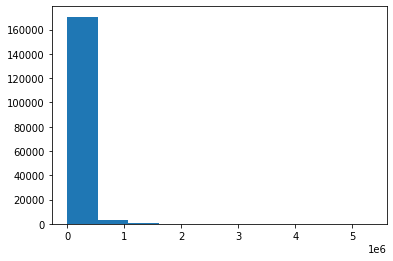

In [17]:
# Duration MS
# hist(music$duration_ms)
# hist(log(music$duration_ms))
# music$log_duration_ms <- log(music$duration_ms)

plt.hist(music.duration_ms)
plt.hist(np.log(music.duration_ms))
music["log_duration_ms"] = np.log(music.duration_ms)

4    44561
3    44086
0    42221
2    27187
1    16334
Name: acousticness_disc, dtype: int64

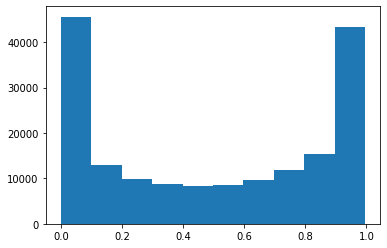

In [18]:
# Acousticness - discretize into 5 bins
# hist(music$acousticness)
# hist(music$acousticness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$acousticness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$acousticness_disc <- discretize(music$acousticness, method = "cluster", breaks = 5, labels = FALSE)
# table(music$acousticness_disc)
# music$acousticness_disc <- as.factor(music$acousticness_disc)

plt.hist(music.acousticness)
music.acousticness.describe()
music["acousticness_disc"] = np.digitize(music.acousticness, [0.08, 0.2, 0.5, 0.89])
music.acousticness_disc = music.acousticness_disc.astype(str)
music.acousticness_disc.value_counts()

4    46678
3    39932
0    39740
2    27905
1    20134
Name: danceability_disc, dtype: int64

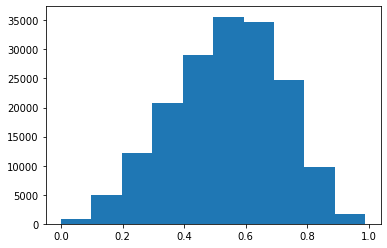

In [19]:
# Danceability - discretize
# hist(music$danceability)
# summary(music$danceability)
# hist(music$danceability, breaks = 20, main = "K-Means")
# abline(v = discretize(music$danceability, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$danceability_disc <- discretize(music$danceability, method = "cluster", breaks = 5, labels = FALSE)
# music$danceability_disc <- as.factor(music$danceability_disc)

plt.hist(music.danceability)
music.danceability.describe()
music["danceability_disc"] = np.digitize(music.danceability, [0.4, 0.47, 0.55, 0.66])
music.danceability_disc = music.danceability_disc.astype(str)
music.danceability_disc.value_counts()

1    42115
2    37296
3    33079
0    32477
4    29422
Name: energy_disc, dtype: int64

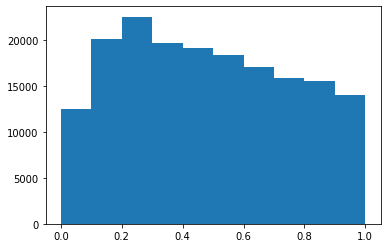

In [20]:
# Energy - transform or discretize
# hist(music$energy)
# library(bestNormalize)
# BNobject <- bestNormalize(music$energy)
# music$energy_trans <- BNobject$x.t
# hist(music$energy_trans)
# hist(music$energy, breaks = 20, main = "K-Means")
# abline(v = discretize(music$energy, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$energy_disc <- discretize(music$energy, method = "cluster", breaks = 5, labels = FALSE)
# music$energy_disc <- as.factor(music$energy_disc)

plt.hist(music.energy)
music.energy.describe()
music["energy_disc"] = np.digitize(music.energy, [0.2, 0.4, 0.6, 0.8])
music.energy_disc = music.energy_disc.astype(str)
music.energy_disc.value_counts()

0    91786
1    31978
4    24535
2    14290
3    11800
Name: instrumentalness_disc, dtype: int64

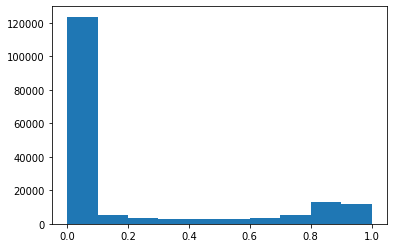

In [21]:
# Instrumentalness - discretize into 5 bins
# hist(music$instrumentalness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$instrumentalness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$instrumentalness_disc <- discretize(music$instrumentalness, method = "cluster", breaks = 5, labels = FALSE)
# music$instrumentalness_disc <- as.factor(music$instrumentalness_disc)

plt.hist(music.instrumentalness)
music.instrumentalness.describe()
music["instrumentalness_disc"] = np.digitize(music.instrumentalness, [0.001, 0.1, 0.5, 0.8])
music.instrumentalness_disc = music.instrumentalness_disc.astype(str)
music.instrumentalness_disc.value_counts()

1    71246
2    42656
3    24118
0    22946
4    13423
Name: liveness_disc, dtype: int64

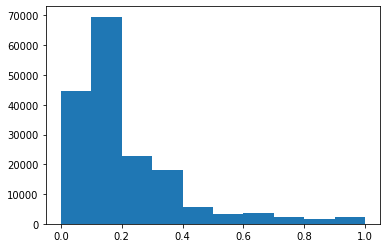

In [22]:
# Key - make factor
# music$key <- as.factor(music$key)

music.key = music.key.astype(str)

# # Liveness - discretize into 5 bins
# hist(music$liveness, breaks = 5)
# table(discretize(music$liveness, method = "cluster", breaks = 5))
# hist(music$liveness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$liveness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$liveness_disc <- discretize(music$liveness, method = "cluster", breaks = 5, labels = FALSE)
# music$liveness_disc <- as.factor(music$liveness_disc)

plt.hist(music.liveness)
music.liveness.describe()
music["liveness_disc"] = np.digitize(music.liveness, [0.08, 0.15, 0.3, 0.5])
music.liveness_disc = music.liveness_disc.astype(str)
music.liveness_disc.value_counts()

3    62359
2    54982
1    27174
0    15712
4    14162
Name: loudness_disc, dtype: int64

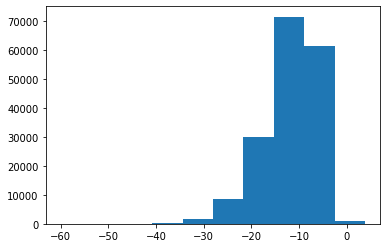

In [23]:
# Loudness - discretize into 5 bins
# hist(music$loudness)
# table(discretize(music$loudness, method = "cluster", breaks = 5))
# hist(music$loudness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$loudness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$loudness_disc <- discretize(music$loudness, method = "cluster", breaks = 5, labels = FALSE)
# music$loudness_disc <- as.factor(music$loudness_disc)

plt.hist(music.loudness)
music.loudness.describe()
music["loudness_disc"] = np.digitize(music.loudness, [-20, -15, -10, -5])
music.loudness_disc = music.loudness_disc.astype(str)
music.loudness_disc.value_counts()

4    44458
3    44443
2    43094
1    26266
0    16128
Name: speechiness_disc, dtype: int64

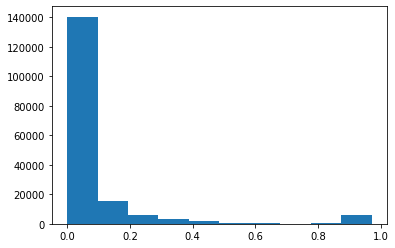

In [24]:
# Speechiness - discretize into 5 bins
# hist(music$speechiness)
# table(discretize(music$speechiness, method = "cluster", breaks = 5))
# hist(music$speechiness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$speechiness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$speechiness_disc <- discretize(music$speechiness, method = "cluster", breaks = 5, labels = FALSE)
# music$speechiness_disc <- as.factor(music$speechiness_disc)

plt.hist(music.speechiness)
music.speechiness.describe()
music["speechiness_disc"] = np.digitize(music.speechiness, [0.03, 0.035, 0.045, 0.075])
music.speechiness_disc = music.speechiness_disc.astype(str)
music.speechiness_disc.value_counts()

4    44447
3    44191
2    42316
0    25567
1    17868
Name: valence_disc, dtype: int64

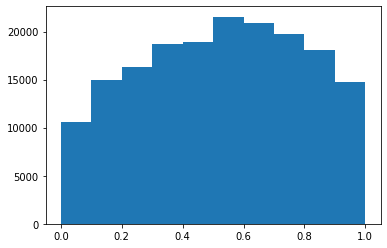

In [25]:
# Valence - discretize into 5 bins
# table(discretize(music$valence, method = "cluster", breaks = 5))
# hist(music$valence, breaks = 20, main = "K-Means")
# abline(v = discretize(music$valence, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$valence_disc <- discretize(music$valence, method = "cluster", breaks = 5, labels = FALSE)
# music$valence_disc <- as.factor(music$valence_disc)

plt.hist(music.valence)
music.valence.describe()
music["valence_disc"] = np.digitize(music.valence, [0.2, 0.31, 0.53, 0.74])
music.valence_disc = music.valence_disc.astype(str)
music.valence_disc.value_counts()

In [26]:
# Mode - factor
# music$mode <- as.factor(music$mode)

music.mode = music["mode"].astype(str)

0    82401
1    61384
2    28398
3     2206
Name: popularity_disc, dtype: int64

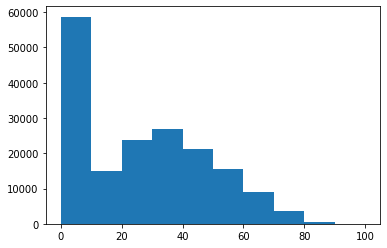

In [27]:
# Popularity - factor w/ 5 levels
# music$popularity_disc <- discretize(music$popularity, method = "interval", breaks = 3, labels = FALSE)
# music$popularity_disc <- as.factor(music$popularity_disc)
# summary(music$popularity)
# table(music$popularity_disc)

plt.hist(music.popularity)
music.popularity.describe()
music["popularity_disc"] = np.digitize(music.popularity, [24, 49, 74])
music.popularity_disc = music.popularity_disc.astype(str)
music.popularity_disc.value_counts()

In [28]:
#Split into 2 datasets: All Numeric, Discretized
# music_raw <- music[which(colnames(music) %in% c("acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", 
#"key", "liveness", "loudness", "mode", "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"))]

# music_disc <- music[which(colnames(music) %in% c("popularity_disc", "decade", "temp_disc", "multi_artist", "log_duration_ms", "danceability_disc", 
#"explicit", "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", "energy_disc",
#"mode"))]

music_raw = music[["acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness","key", "liveness", "loudness", "mode", 
                   "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"]]

music_disc = music[["popularity_disc", "decade", "tempo_disc", "multi_artist", "log_duration_ms", "danceability_disc", "explicit", 
                    "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", 
                    "energy_disc", "mode"]]

In [29]:
# split into training and holdout
X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
#Naive Model
y_test['popularity_disc'].value_counts()
24628/(len(y_test))*100  #47.07456467305082 accuracy

47.07456467305082

In [31]:
# create tuning parameter grid function
def expand_grid(dictionary):
   return pd.DataFrame([i for i in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [32]:
# DECISION TREE
# Create tuning grid for Decision Tree
dictionary = {'criterion': ['entropy','gini'],
             'splitter': ['random','best'],
             'max_depth': [8,10,25]}

grid = expand_grid(dictionary)


# CREATE MODEL
accuracies = []
for i in grid.index:
    dt = DecisionTreeClassifier(criterion = grid.iloc[i,0]  , splitter = grid.iloc[i,1], max_depth = grid.iloc[i,2])

    dt = dt.fit(X_train,y_train)

    accuracies.append(dt.score(X_test,y_test))

    
# CHECK ACCURACIES AND WHICH MODEL IS BEST
dt_accuracies = pd.DataFrame(accuracies)
dt_accuracies = dt_accuracies.rename(columns={0: "accuracy"})
dt_accuracies['criterion'] = grid.iloc[:,0]
dt_accuracies['splitter'] = grid.iloc[:,1]
dt_accuracies['max_depth'] = grid.iloc[:,2]
dt_accuracies

best_dt_model = dt_accuracies.iloc[dt_accuracies['accuracy'].idxmax()]
best_dt_model
# 0.761664 accuracy

accuracy     0.761416
criterion        gini
splitter         best
max_depth          10
Name: 10, dtype: object

In [33]:
# RANDOM FOREST
# CREATE MODEL

rf = RandomForestRegressor(n_estimators = 2000, random_state = 42, max_features = 'sqrt', bootstrap = True)

rf = rf.fit(X_train,y_train.values.ravel())
    
accuracy = rf.score(X_test,y_test)

best_rf_model = accuracy
best_rf_model
# 0.5487814522196701 accuracy

0.5487814522196701

In [34]:
## Feature Importance values and plots for RF model
importances_rf = pd.DataFrame({'feature': X.columns,
                            'importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('importance', ascending=False)
importances_rf['cum_importance'] = importances_rf.importance.cumsum()
importances_rf.loc[importances_rf.cum_importance <= .80]

feature  importance  cum_importance
0                  decade    0.291001        0.291001
3         log_duration_ms    0.148391        0.439392
12      acousticness_disc    0.076291        0.515684
7                     key    0.068363        0.584046
6   instrumentalness_disc    0.061948        0.645994
13            energy_disc    0.055455        0.701449
9           loudness_disc    0.046903        0.748352
10       speechiness_disc    0.043637        0.791989

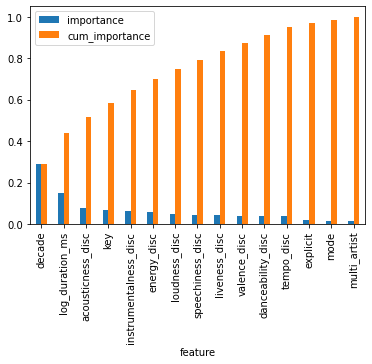

In [35]:
imp_rf = importances_rf.set_index('feature')
imp_rf.plot(kind='bar');

# Support Vector Machine

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# split into training and holdout
X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [38]:
from sklearn.svm import SVC

In [106]:
modelSVC = SVC()

In [107]:
# Train the Model

# X_train, X_test, y_train, y_test

modelSVC.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [108]:
#Make predictions with the model

predictions = modelSVC.predict(X_test)

In [109]:
#Measure the performance of our model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [110]:
print(classification_report(y_test, predictions))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      0.95      0.79     24628
           1       0.75      0.74      0.74     18398
           2       0.00      0.00      0.00      8609
           3       0.00      0.00      0.00       682

    accuracy                           0.70     52317
   macro avg       0.36      0.42      0.38     52317
weighted avg       0.58      0.70      0.63     52317



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# precision    recall  f1-score   support
#
#           0       0.68      0.95      0.79     24628
#           1       0.75      0.74      0.74     18398
#           2       0.00      0.00      0.00      8609
#           3       0.00      0.00      0.00       682

#    accuracy                           0.70     52317
#   macro avg       0.36      0.42      0.38     52317
#weighted avg       0.58      0.70      0.63     52317

In [84]:
print(confusion_matrix(y_test, predictions))

[[23294  1334     0     0]
 [ 4809 13589     0     0]
 [ 5380  3229     0     0]
 [  614    68     0     0]]


In [46]:
#[[23294  1334     0     0]
# [ 4809 13589     0     0]
# [ 5380  3229     0     0]
# [  614    68     0     0]]

In [75]:
from sklearn import metrics

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.704990729590764


In [47]:
######### Get the VIP for SVM ############

In [48]:
# split into training and holdout
# X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
# y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [103]:
modelSVC.decision_function

<bound method BaseSVC.decision_function of SVC()>

In [104]:
modelSVC.decision_function_shape

'ovr'

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [93]:
# Cat Boost

from catboost import CatBoostClassifier
XGcat = CatBoostClassifier(n_estimators=100)

In [94]:
XGcat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.8308723	total: 81.3ms	remaining: 8.05s
1:	learn: 0.7254754	total: 101ms	remaining: 4.97s
2:	learn: 0.6709696	total: 121ms	remaining: 3.91s
3:	learn: 0.6402826	total: 141ms	remaining: 3.37s
4:	learn: 0.6213259	total: 160ms	remaining: 3.04s
5:	learn: 0.6123167	total: 180ms	remaining: 2.83s
6:	learn: 0.6040364	total: 201ms	remaining: 2.67s
7:	learn: 0.5990627	total: 222ms	remaining: 2.56s
8:	learn: 0.5962104	total: 244ms	remaining: 2.46s
9:	learn: 0.5938016	total: 265ms	remaining: 2.39s
10:	learn: 0.5911697	total: 285ms	remaining: 2.31s
11:	learn: 0.5884617	total: 305ms	remaining: 2.23s
12:	learn: 0.5866350	total: 323ms	remaining: 2.16s
13:	learn: 0.5851808	total: 341ms	remaining: 2.1s
14:	learn: 0.5835846	total: 361ms	remaining: 2.05s
15:	learn: 0.5825254	total: 380ms	remaining: 2s
16:	learn: 0.5808816	total: 403ms	remaining: 1.97s
17:	learn: 0.5797665	total: 425ms	remaining: 1.94s
18:	learn: 0.5786131	total: 449ms	remaining: 1.91s
19:	learn: 0.577815

In [95]:
# X_train, X_test, y_train, y_test
print(classification_report(y_test,XGcat.predict(X_test)))

#                precision    recall  f1-score   support
#
#           0       0.86      0.86      0.86     24628
#           1       0.71      0.81      0.76     18398
#           2       0.62      0.47      0.53      8609
#           3       0.42      0.09      0.15       682

#    accuracy                           0.77     52317
#   macro avg       0.65      0.56      0.57     52317
#weighted avg       0.76      0.77      0.76     52317

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     24628
           1       0.71      0.81      0.76     18398
           2       0.62      0.47      0.53      8609
           3       0.42      0.09      0.15       682

    accuracy                           0.77     52317
   macro avg       0.65      0.56      0.57     52317
weighted avg       0.76      0.77      0.76     52317



In [96]:
# get importance
importance = XGcat.feature_importances_

In [97]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 39.11491
Feature: 1, Score: 3.54325
Feature: 2, Score: 1.60405
Feature: 3, Score: 9.96120
Feature: 4, Score: 5.46436
Feature: 5, Score: 1.41319
Feature: 6, Score: 9.09986
Feature: 7, Score: 3.86759
Feature: 8, Score: 4.14806
Feature: 9, Score: 4.47113
Feature: 10, Score: 5.03660
Feature: 11, Score: 3.68511
Feature: 12, Score: 4.36306
Feature: 13, Score: 3.14006
Feature: 14, Score: 1.08755


In [99]:
from matplotlib import pyplot

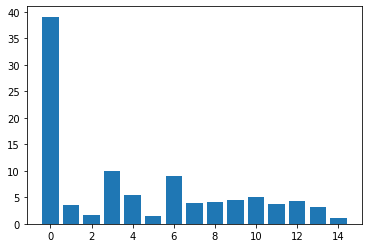

In [100]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [101]:
# X.head

<bound method NDFrame.head of         decade tempo_disc multi_artist  log_duration_ms danceability_disc  \
0         1920          4            0        12.033699                 3   
1         1920          1            0        11.919723                 4   
2         1920          2            0        12.006566                 3   
3         1920          3            0        12.952967                 4   
4         1920          3            0        12.015057                 4   
...        ...        ...          ...              ...               ...   
174384    2020          3            1        11.902363                 4   
174385    2020          2            0        11.882556                 1   
174386    2020          2            0        12.292924                 4   
174387    2020          4            0        12.404924                 1   
174388    2020          2            0        12.194557                 4   

       explicit instrumentalness_disc key liv

In [102]:
# X

decade tempo_disc multi_artist  log_duration_ms danceability_disc  \
0         1920          4            0        12.033699                 3   
1         1920          1            0        11.919723                 4   
2         1920          2            0        12.006566                 3   
3         1920          3            0        12.952967                 4   
4         1920          3            0        12.015057                 4   
...        ...        ...          ...              ...               ...   
174384    2020          3            1        11.902363                 4   
174385    2020          2            0        11.882556                 1   
174386    2020          2            0        12.292924                 4   
174387    2020          4            0        12.404924                 1   
174388    2020          2            0        12.194557                 4   

       explicit instrumentalness_disc key liveness_disc loudness_disc  \
0             0                     0   5             3             2   
1             0                     1   5             1             3   
2             0                     0   0             4             2   
3             0                     4   2             1             3   
4             1                     0  10             3             3   
...         ...                   ...  ..           ...           ...   
174384        0                     0   6             2             3   
174385        0                     0   4             2             2   
174386        0                     4   4             1             2   
174387        1                     0   0             1             2   
174388        0                     4   7             2             2   

       speechiness_disc valence_disc acousticness_disc energy_disc  mode  
0                     4            3                 4           1     0  
1                     3            4                 3           2     0  
2                     4            3                 4           0     1  
3                     2            0                 0           3     1  
4                     4            1                 2           3     0  
...                 ...          ...               ...         ...   ...  
174384                2            0                 0           4     0  
174385                2            1                 3           1     1  
174386                0            3                 3           2     0  
174387                2            2                 4           1     1  
174388                0            4                 2           2     1  

[174389 rows x 15 columns]